In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x13712254050>,
 'caps': [<matplotlib.lines.Line2D at 0x1371223b850>,
 'boxes': [<matplotlib.lines.Line2D at 0x13712273bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x13712281890>],
 'fliers': [<matplotlib.lines.Line2D at 0x13712282510>],
 'means': []}

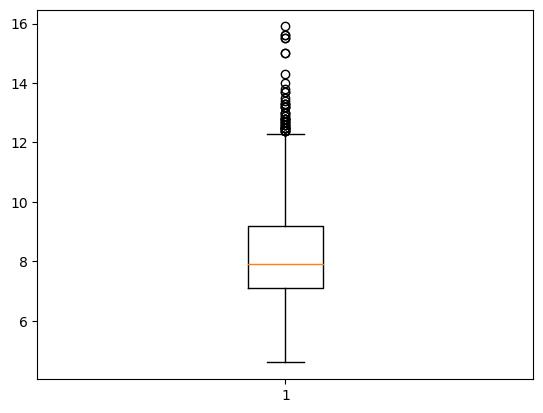

In [8]:
plt.boxplot(data['fixed acidity'])

In [13]:
Q1 = data['fixed acidity'].quantile(0.25)
Q3 = data['fixed acidity'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['fixed acidity'] >= upper)[0]
lower_index = np.where(data['fixed acidity'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)


7.1 9.2 2.0999999999999996


{'whiskers': [<matplotlib.lines.Line2D at 0x13713b541d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13713b50f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x13713b54b90>],
 'medians': [<matplotlib.lines.Line2D at 0x13713b4f8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13713b4c750>],
 'means': []}

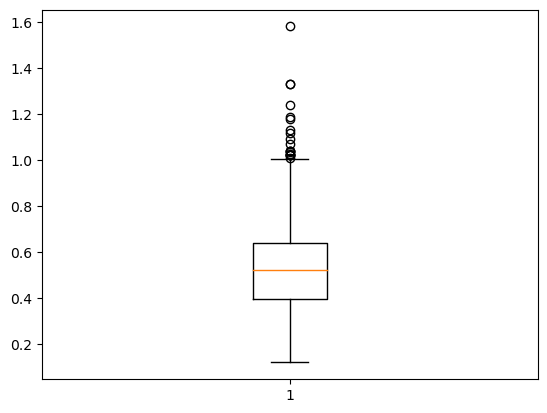

In [14]:
plt.boxplot(data['volatile acidity'])

In [15]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [16]:
Q1 = data['volatile acidity'].quantile(0.25)
Q3 = data['volatile acidity'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['volatile acidity'] >= upper)[0]
lower_index = np.where(data['volatile acidity'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)

0.395 0.64 0.245


{'whiskers': [<matplotlib.lines.Line2D at 0x13713bf7b10>,
 'caps': [<matplotlib.lines.Line2D at 0x13713c04ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13713bf7250>],
 'medians': [<matplotlib.lines.Line2D at 0x13713c05e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x137122ae410>],
 'means': []}

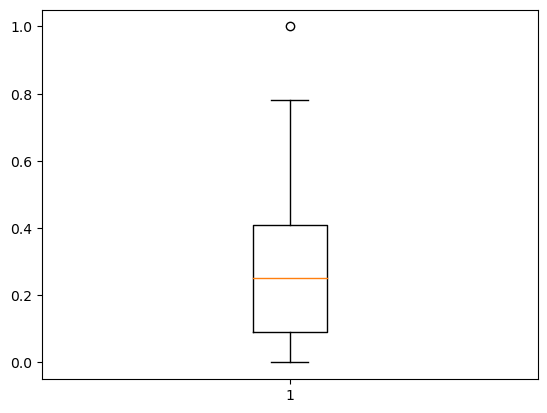

In [17]:
plt.boxplot(data['citric acid'])

In [18]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x13713c63cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x13713c70f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x13713c635d0>],
 'medians': [<matplotlib.lines.Line2D at 0x13713c720d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13713c728d0>],
 'means': []}

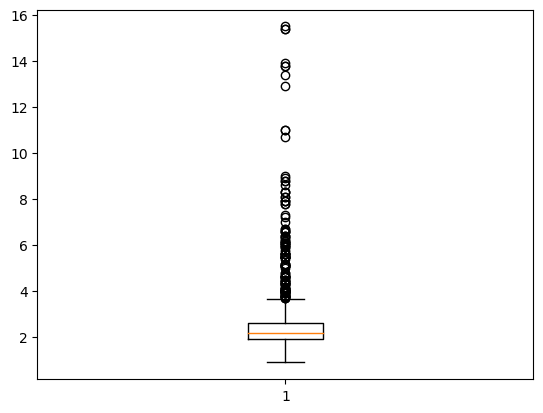

In [19]:
plt.boxplot(data['residual sugar'])

In [20]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [21]:
Q1 = data['residual sugar'].quantile(0.25)
Q3 = data['residual sugar'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['residual sugar'] >= upper)[0]
lower_index = np.where(data['residual sugar'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)

1.9 2.6 0.7000000000000002


In [22]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1525,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1526,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1527,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1528,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x13713cd7250>,
 'caps': [<matplotlib.lines.Line2D at 0x13713ce8490>,
 'boxes': [<matplotlib.lines.Line2D at 0x13713cd69d0>],
 'medians': [<matplotlib.lines.Line2D at 0x13713ce94d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13713ce9c50>],
 'means': []}

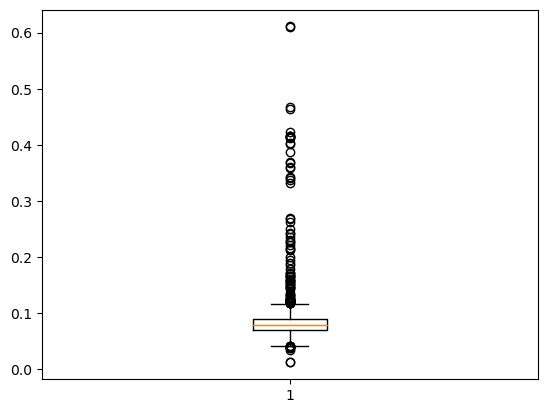

In [24]:
plt.boxplot(data['chlorides'])

In [25]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [26]:
Q1 = data['chlorides'].quantile(0.25)
Q3 = data['chlorides'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['chlorides'] >= upper)[0]
lower_index = np.where(data['chlorides'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)

0.07 0.089 0.01899999999999999


In [27]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1388,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1389,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1390,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [28]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x137122b4250>,
 'caps': [<matplotlib.lines.Line2D at 0x13713d4a790>,
 'boxes': [<matplotlib.lines.Line2D at 0x13713d48d10>],
 'medians': [<matplotlib.lines.Line2D at 0x13713d4ba10>],
 'fliers': [<matplotlib.lines.Line2D at 0x13713d50210>],
 'means': []}

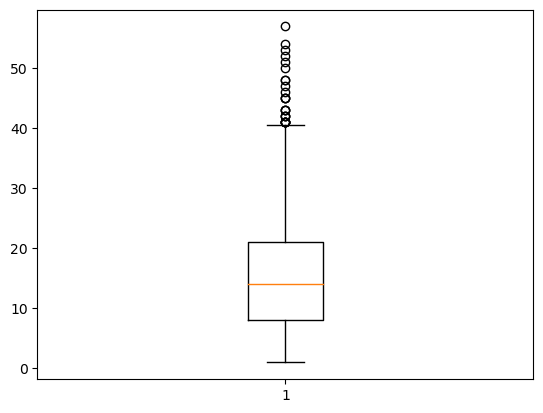

In [29]:
plt.boxplot(data['free sulfur dioxide'])

{'whiskers': [<matplotlib.lines.Line2D at 0x13713d9be90>,
 'caps': [<matplotlib.lines.Line2D at 0x13713da91d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13713d9b550>],
 'medians': [<matplotlib.lines.Line2D at 0x13713daa190>],
 'fliers': [<matplotlib.lines.Line2D at 0x13713daa890>],
 'means': []}

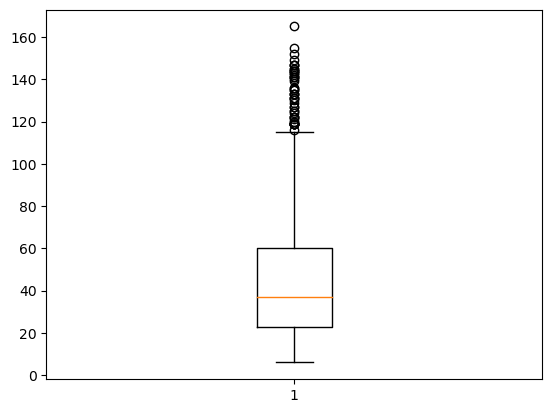

In [30]:
plt.boxplot(data['total sulfur dioxide'])

In [31]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

In [32]:
Q1 = data['total sulfur dioxide'].quantile(0.25)
Q3 = data['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['total sulfur dioxide'] >= upper)[0]
lower_index = np.where(data['total sulfur dioxide'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)

23.0 60.0 37.0


In [33]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1284,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1285,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1286,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1287,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


{'whiskers': [<matplotlib.lines.Line2D at 0x13713ca5050>,
 'caps': [<matplotlib.lines.Line2D at 0x13713e29a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x13713de4310>],
 'medians': [<matplotlib.lines.Line2D at 0x13713e2ab50>],
 'fliers': [<matplotlib.lines.Line2D at 0x13713db4510>],
 'means': []}

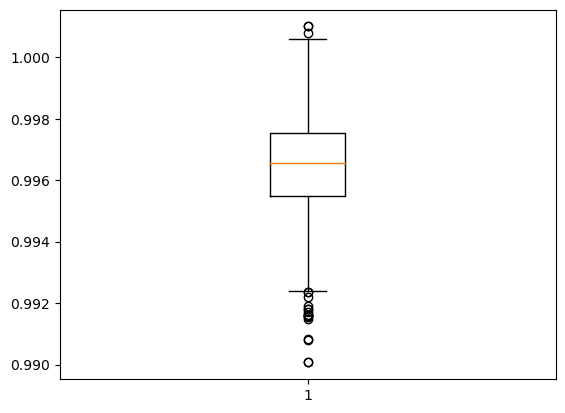

In [34]:
plt.boxplot(data['density'])

In [35]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

Q1 = data['density'].quantile(0.25)
Q3 = data['density'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['density'] >= upper)[0]
lower_index = np.where(data['density'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)

0.99547 0.99753 0.0020600000000000618


In [36]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1233,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1234,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1235,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1236,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


{'whiskers': [<matplotlib.lines.Line2D at 0x13714e90850>,
 'caps': [<matplotlib.lines.Line2D at 0x13714e7c610>,
 'boxes': [<matplotlib.lines.Line2D at 0x13714e7fe50>],
 'medians': [<matplotlib.lines.Line2D at 0x13714e92b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x13714e93350>],
 'means': []}

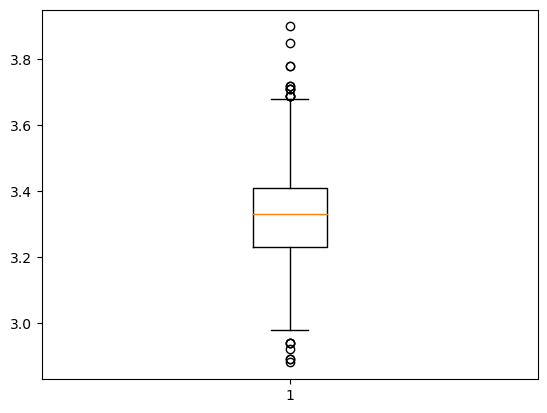

In [37]:
plt.boxplot(data['pH'])

In [38]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x13714ee6650>,
 'caps': [<matplotlib.lines.Line2D at 0x13714ee7910>,
 'boxes': [<matplotlib.lines.Line2D at 0x13714ee5d50>],
 'medians': [<matplotlib.lines.Line2D at 0x13714ef49d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13714ef5210>],
 'means': []}

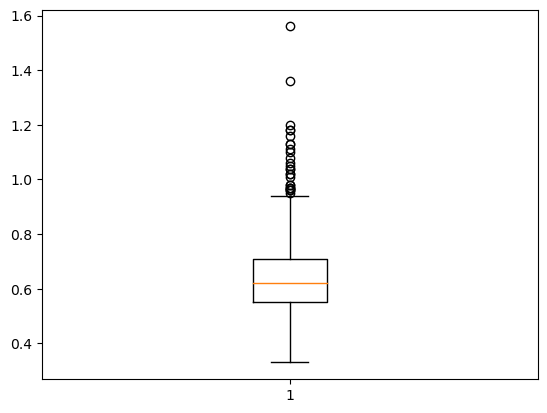

In [39]:
plt.boxplot(data['sulphates'])

In [40]:
data.reset_index(inplace=True)
data.drop('index',axis=1,inplace=True)

Q1 = data['sulphates'].quantile(0.25)
Q3 = data['sulphates'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_index = np.where(data['sulphates'] >= upper)[0]
lower_index = np.where(data['sulphates'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)

0.55 0.71 0.15999999999999992


{'whiskers': [<matplotlib.lines.Line2D at 0x13714f50390>,
 'caps': [<matplotlib.lines.Line2D at 0x13714f51750>,
 'boxes': [<matplotlib.lines.Line2D at 0x13714f43a50>],
 'medians': [<matplotlib.lines.Line2D at 0x13714f52a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x13714f53090>],
 'means': []}

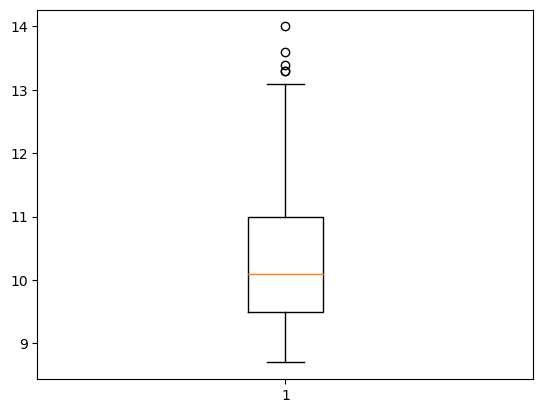

In [41]:
plt.boxplot(data['alcohol'])

In [42]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1213,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1214,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1215,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1216,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [43]:
x = data.drop('quality', axis=1)
y = data['quality']

In [44]:
x
y

0       5
1       5
2       5
3       6
4       5
       ..
1213    5
1214    6
1215    6
1216    5
1217    6
Name: quality, Length: 1191, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [48]:
x_train.shape

(952, 11)

In [51]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Train score:', model.score(x_train, y_train))
print('Test score:', model.score(x_test, y_test))
print('Error:', mean_squared_error(y_test, y_pred))

Train score: 0.9267087362713144
Test score: 0.5015875536480685
Error: 0.25209874476987454


In [53]:
model2 = DecisionTreeRegressor(max_depth=5)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print('Train score:', model2.score(x_train, y_train))
print('Test score', model2.score(x_test, y_test))
print('Error:', mean_squared_error(y_test, y_pred))

Train score: 0.5082767358676089
Test score 0.33427756303500156
Error: 0.33672471855872155


In [54]:
model3 = DecisionTreeRegressor(max_depth=10)
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
print('Train score:', model3.score(x_train, y_train))
print('Test score', model3.score(x_test, y_test))
print('Error:', mean_squared_error(y_test, y_pred))

Train score: 0.8868642507150231
Test score 0.06252555079853372
Error: 0.4741778292804531


In [ ]:
model.get_params